In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

c:\Users\m8rqu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Specify the path to the folder you want to check
import os

folder_path = 'C:/Users/m8rqu/Documents/Data BootCamp/Opoid/Resources'  # Replace with the actual path to your folder

# Use the os.listdir() function to get a list of files and subdirectories
contents = os.listdir(folder_path)

# Loop through the list and print each item (file or subdirectory)
for item in contents:
    print(item)

company.csv
improved_2015.csv
va_2015.csv
va_opioid.gz
virginia_2015.csv


In [4]:
import gzip
with gzip.open('C:/Users/m8rqu/Documents/Data BootCamp/Opoid/Resources/va_opioid.gz', 'rb') as gz_file:
    #Read the CSV data into a dataframe
    df = pd.read_csv(gz_file)



C:\Users\m8rqu\AppData\Local\Temp\ipykernel_2204\1188156353.py:4: DtypeWarning: Columns (3,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(gz_file)


In [5]:
df.columns

Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_ZIP',
       'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO', 'DRUG_NAME', 'Measure',
       'MME_Conversion_Factor', 'Dosage_Strength', 'TRANSACTION_DATE',
       'Combined_Labeler_Name', 'Reporter_family', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'MME', 'BUYER_STATE', 'BUYER_COUNTY'],
      dtype='object')

In [6]:
op_va_df=df[['TRANSACTION_DATE','BUYER_STATE','BUYER_COUNTY','Dosage_Strength','DOSAGE_UNIT','Combined_Labeler_Name']]
op_va_df=op_va_df.sort_values(by='TRANSACTION_DATE')
op_va_df.head()

,TRANSACTION_DATE,BUYER_STATE,BUYER_COUNTY,Dosage_Strength,DOSAGE_UNIT,Combined_Labeler_Name
7173765,2006-01-01,VA,PETERSBURG CITY,7.5,100.0,Teva
3505736,2006-01-01,VA,PETERSBURG CITY,7.5,100.0,SpecGx LLC
3503953,2006-01-01,VA,PETERSBURG CITY,7.5,100.0,SpecGx LLC
5910411,2006-01-01,VA,HALIFAX,7.5,300.0,SpecGx LLC
6982564,2006-01-01,VA,ROANOKE CITY,10.0,500.0,Actavis


In [7]:
opioid_info = op_va_df
print(op_va_df.columns)
print(op_va_df.index)

Index(['TRANSACTION_DATE', 'BUYER_STATE', 'BUYER_COUNTY', 'Dosage_Strength',
       'DOSAGE_UNIT', 'Combined_Labeler_Name'],
      dtype='object')
Int64Index([7173765, 3505736, 3503953, 5910411, 6982564, 7587807, 1562317,
            3121055, 6539027, 1847317,
            ...
            6809002, 6809003, 6809004, 6809005, 6809006, 6809416, 6809435,
            6809436, 6096151, 3613124],
           dtype='int64', length=7971411)


In [8]:
# To prepare for time series we index the date
op_va_df['TRANSACTION_DATE'] = pd.to_datetime(op_va_df['TRANSACTION_DATE'])
op_va_df.set_index('TRANSACTION_DATE', inplace=True)

In [9]:
#checking my work
op_va_df.head()

,BUYER_STATE,BUYER_COUNTY,Dosage_Strength,DOSAGE_UNIT,Combined_Labeler_Name
TRANSACTION_DATE,,,,,
2006-01-01,VA,PETERSBURG CITY,7.5,100.0,Teva
2006-01-01,VA,PETERSBURG CITY,7.5,100.0,SpecGx LLC
2006-01-01,VA,PETERSBURG CITY,7.5,100.0,SpecGx LLC
2006-01-01,VA,HALIFAX,7.5,300.0,SpecGx LLC
2006-01-01,VA,ROANOKE CITY,10.0,500.0,Actavis


In [10]:
# Resample to monthly data and calculate the mean
monthly_mean = op_va_df.resample('M').mean()

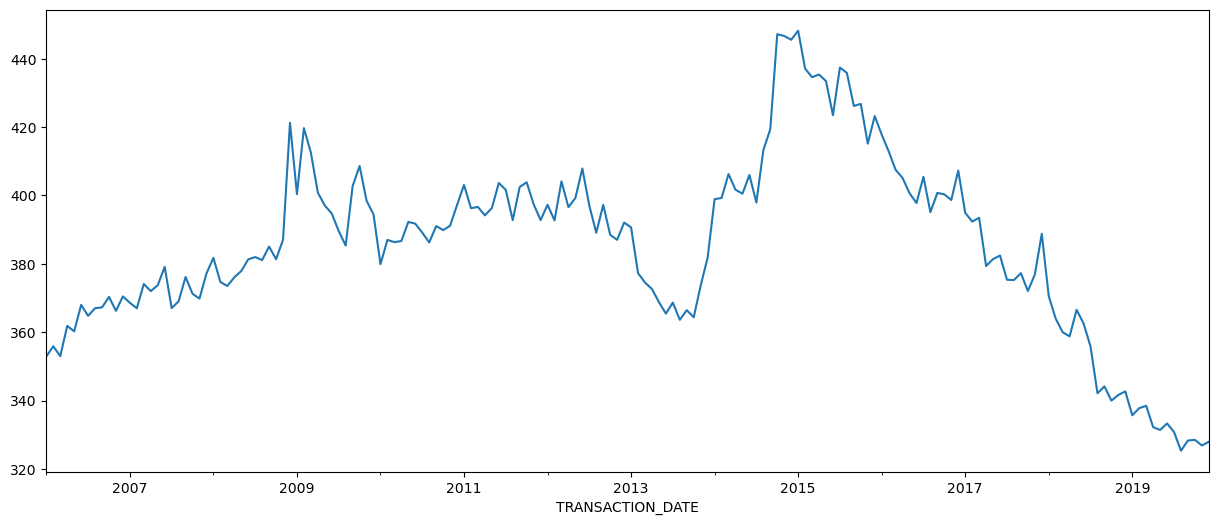

In [11]:
monthly_mean['DOSAGE_UNIT'].plot(figsize=(15, 6))
plt.show()

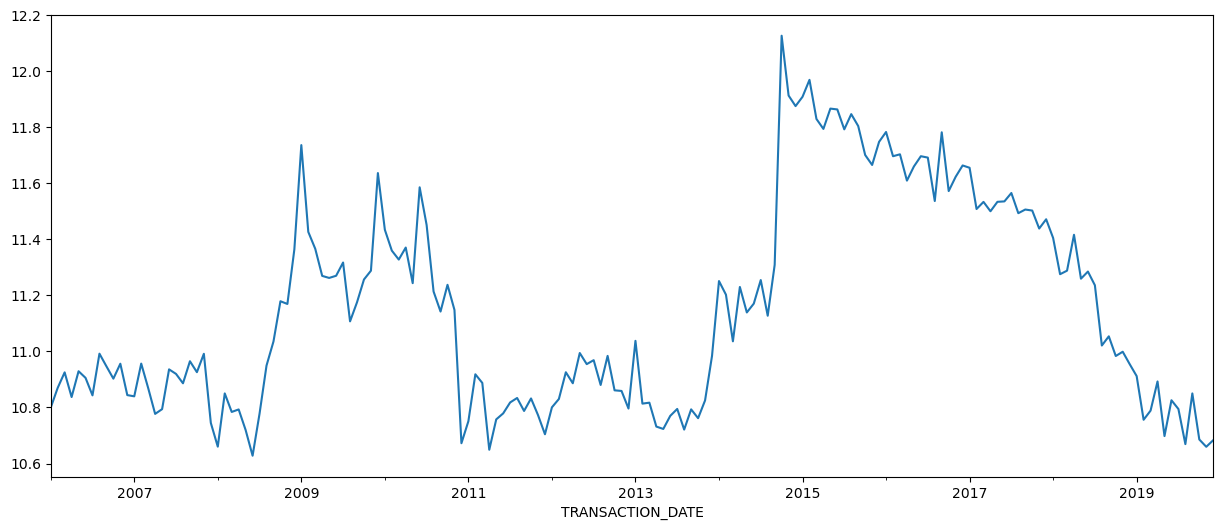

In [12]:
monthly_mean['Dosage_Strength'].plot(figsize=(15, 6))
plt.show()

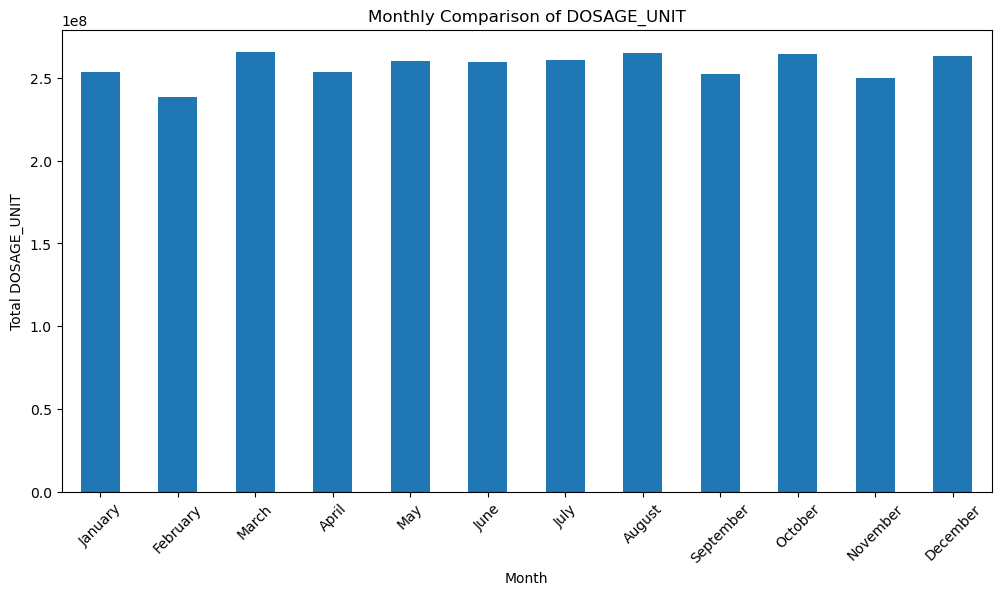

In [13]:
# Group the data by month and calculate the total dosage units for each month
monthly_consumption = op_va_df.groupby(op_va_df.index.strftime('%B'))['DOSAGE_UNIT'].sum()

# Define a list of month names in the desired order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Create a bar chart with custom month labels
plt.figure(figsize=(12, 6))
monthly_consumption[month_order].plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total DOSAGE_UNIT')
plt.title('Monthly Comparison of DOSAGE_UNIT')
plt.xticks(rotation=45)
plt.show()

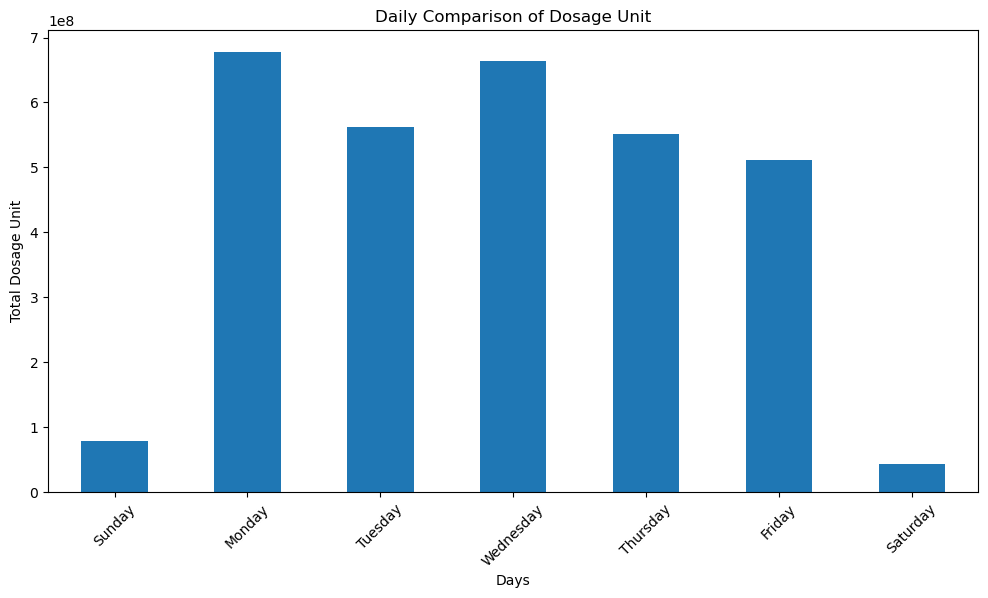

In [14]:
daily_consumption = op_va_df.groupby(op_va_df.index.strftime('%A'))['DOSAGE_UNIT'].sum()

#Creating a correctly order list

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']

# Create a bar chart to compare monthly consumption
plt.figure(figsize=(12, 6))
daily_consumption[day_order].plot(kind='bar')
plt.xlabel('Days')
plt.ylabel('Total Dosage Unit')
plt.title('Daily Comparison of Dosage Unit')
plt.xticks(rotation=45)
plt.show()

In [15]:
monthly_mean['Dosage_Strength']


TRANSACTION_DATE
2006-01-31    10.799288
2006-02-28    10.869852
2006-03-31    10.925238
2006-04-30    10.837217
2006-05-31    10.929269
                ...    
2019-08-31    10.669220
2019-09-30    10.850084
2019-10-31    10.685736
2019-11-30    10.659681
2019-12-31    10.683154
Freq: M, Name: Dosage_Strength, Length: 168, dtype: float64

In [16]:
opioid_info=df[['TRANSACTION_DATE','BUYER_STATE','BUYER_COUNTY','Dosage_Strength','DOSAGE_UNIT','Combined_Labeler_Name']]
opioid_info.head()

,TRANSACTION_DATE,BUYER_STATE,BUYER_COUNTY,Dosage_Strength,DOSAGE_UNIT,Combined_Labeler_Name
0,2017-08-09,VA,FAIRFAX,20.0,300.0,Teva
1,2017-08-09,VA,FAIRFAX,10.0,1000.0,"Par Pharmaceutical, Inc."
2,2017-08-09,VA,FAIRFAX,5.0,500.0,SpecGx LLC
3,2017-08-09,VA,FAIRFAX,10.0,300.0,Amneal
4,2017-08-09,VA,FAIRFAX,20.0,500.0,Zydus Pharmaceuticals (USA) Inc.


In [17]:
opioid_info['TRANSACTION_DATE'] = pd.to_datetime(opioid_info['TRANSACTION_DATE'])

#Extract the months
opioid_info['Year']=opioid_info['TRANSACTION_DATE'].dt.to_period('Y')
yearly_dosage = opioid_info.groupby(['Year','BUYER_COUNTY'])['DOSAGE_UNIT'].sum().reset_index()
yearly_dosage

C:\Users\m8rqu\AppData\Local\Temp\ipykernel_2204\2882112659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_info['TRANSACTION_DATE'] = pd.to_datetime(opioid_info['TRANSACTION_DATE'])
C:\Users\m8rqu\AppData\Local\Temp\ipykernel_2204\2882112659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_info['Year']=opioid_info['TRANSACTION_DATE'].dt.to_period('Y')


,Year,BUYER_COUNTY,DOSAGE_UNIT
0,2006,ACCOMACK,487300.0
1,2006,ALBEMARLE,2033730.0
2,2006,ALEXANDRIA CITY,1321972.0
3,2006,ALLEGHANY,300820.0
4,2006,AMELIA,168300.0
...,...,...,...
1755,2019,WESTMORELAND,188010.0
1756,2019,WINCHESTER CITY,871570.0
1757,2019,WISE,3153070.0
1758,2019,WYTHE,1284450.0


In [40]:
yr_2015 = yearly_dosage[yearly_dosage['Year'] == '2015']
yr_2015 = yr_2015.rename(columns ={'BUYER_COUNTY':'Counties'}) 
yr_2015 = yr_2015.drop(['Year'], axis = 1, inplace = True)



,Year,Counties,DOSAGE_UNIT
1132,2015,ACCOMACK,802000.0
1133,2015,ALBEMARLE,2400430.0
1134,2015,ALEXANDRIA CITY,1891010.0
1135,2015,ALLEGHANY,612500.0
1136,2015,AMELIA,231320.0
...,...,...,...
1252,2015,WESTMORELAND,271460.0
1253,2015,WINCHESTER CITY,1872140.0
1254,2015,WISE,4954510.0
1255,2015,WYTHE,1866770.0


In [43]:
yr_2015.head()

,Counties,DOSAGE_UNIT
1132,ACCOMACK,802000.0
1133,ALBEMARLE,2400430.0
1134,ALEXANDRIA CITY,1891010.0
1135,ALLEGHANY,612500.0
1136,AMELIA,231320.0
...,...,...
1252,WESTMORELAND,271460.0
1253,WINCHESTER CITY,1872140.0
1254,WISE,4954510.0
1255,WYTHE,1866770.0


In [29]:
import json

# Define the file path where you want to save the JSON file
file_path = 'C:/Users/m8rqu/Documents/Data BootCamp/Opoid/Resources/va_drug_2015.csv'

# Export the DataFrame to a csv file
yr_2015.to_csv(file_path,index= False)